In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import datetime as dt

from dateutil.relativedelta import *
from dateutil.parser import *
from sqlalchemy.dialects.sqlite import \
            BLOB, BOOLEAN, CHAR, DATE, DATETIME, DECIMAL, FLOAT, \
            INTEGER, NUMERIC, JSON, SMALLINT, TEXT, TIME, TIMESTAMP, \
            VARCHAR

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import select
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, cast
import sqlite3

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite",echo=False)

# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare (engine, reflect = True)

# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()
measurements_df = pd.read_sql_query('SELECT * from measurement',con=conn)
stations_df = pd.read_sql_query('SELECT * from station',con=conn)

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by((measurement.date.desc())).first()
end_date=dt.datetime.strptime(latest_date[0],'%Y-%m-%d')
timestamp_end = dt.datetime.strftime(end_date,'%Y-%m-%d')


In [9]:
latest_date

('2017-08-23')

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
start_date = end_date + relativedelta(months=-12)
timestamp_start = dt.datetime.strftime(start_date,'%Y-%m-%d')

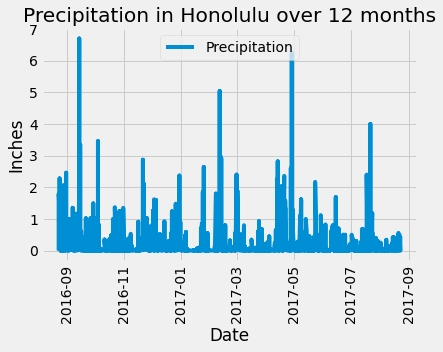

In [11]:
# Perform a query to retrieve the data and precipitation scores
prcp_result = engine.execute('SELECT date,prcp FROM measurement WHERE date BETWEEN :start AND :end',(timestamp_start,timestamp_end)).fetchall()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_result)
prcp_df[0]=pd.to_datetime(prcp_df[0])
prcp_final = prcp_df.rename(columns={0:'Date',1:'Precipitation'}).set_index('Date').dropna()

# Sort the dataframe by date
prcp_chart = prcp_final.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prcp_chart.index, prcp_chart["Precipitation"],label="Precipitation")
plt.legend(loc="upper center")
plt.title("Precipitation in Honolulu over 12 months")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_chart.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [75]:
# SELECT * FROM station RIGHT JOIN measurement ON station.station=measurement.station
sel = select(measurement)
result = conn.execute(sel)
str(sel)

TypeError: 'DeclarativeMeta' object is not iterable

In [33]:
meas_stations = session.query(func.count(distinct(measurement.station))).all()
stat_stations = session.query(func.count(distinct(station.station))).all()
meas_stations,stat_stations

([(9)], [(9)])

In [87]:
# Design a query to calculate the total number stations in the dataset
# measurements_df = pd.read_sql_query('SELECT * from measurement',con=conn)
# stations_df = pd.read_sql_query('SELECT * from station',con=conn)
merged_data = stations_df.join(measurements_df.set_index('station'), on='station')

ValueError: columns overlap but no suffix specified: Index(['id'], dtype='object')

In [14]:
station_count = session.query(merged_data.station)

NameError: name 'merged_data' is not defined

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()